In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
path = r"/content/drive/My Drive/Colab Notebooks/DataHack - Analytics Vidhya /JantaHack: Machine Learning in Agriculture"
train = pd.read_csv(path + "/train.csv")
test = pd.read_csv(path + "/test.csv")
submission = pd.read_csv(path + "/sample_submission.csv")


In [5]:
train.shape, test.shape, submission.shape

((88858, 10), (59310, 9), (59310, 2))

In [6]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [7]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       59310 non-null  object 
 1   Estimated_Insects_Count  59310 non-null  int64  
 2   Crop_Type                59310 non-null  int64  
 3   Soil_Type                59310 non-null  int64  
 4   Pesticide_Use_Category   59310 non-null  int64  
 5   Number_Doses_Week        59310 non-null  int64  
 6   Number_Weeks_Used        53417 non-null  float64
 7   Number_Weeks_Quit        59310 non-null  int64  
 8   Season                   59310 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 4.1+ MB


In [10]:
train.isna().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [11]:
test.isna().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [12]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [38]:
train[train.Pesticide_Use_Category == 1].Number_Weeks_Used.isna().sum()

97

In [14]:
train[train.Pesticide_Use_Category == 1].Number_Weeks_Used.value_counts()

0.0    740
Name: Number_Weeks_Used, dtype: int64

In [15]:
train[train.Pesticide_Use_Category == 2].Number_Weeks_Used.isna().sum()

6479

In [16]:
train[train.Pesticide_Use_Category == 2].Number_Weeks_Used.value_counts()

20.0    3290
30.0    2849
25.0    2494
15.0    2150
22.0    1897
        ... 
62.0      10
61.0       9
63.0       3
65.0       2
64.0       2
Name: Number_Weeks_Used, Length: 61, dtype: int64

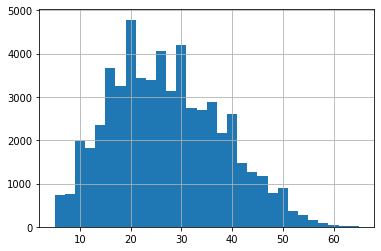

In [17]:
train[train.Pesticide_Use_Category == 2].Number_Weeks_Used.hist(bins=30)

In [18]:
train[train.Pesticide_Use_Category == 3].Number_Weeks_Used.isna().sum()

2424

In [19]:
train[train.Pesticide_Use_Category == 3].Number_Weeks_Used.value_counts()

40.0    942
30.0    916
35.0    729
50.0    721
25.0    626
       ... 
63.0     47
64.0     42
65.0     29
66.0     17
67.0      8
Name: Number_Weeks_Used, Length: 63, dtype: int64

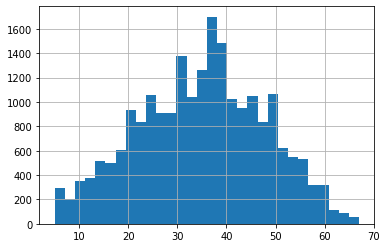

In [20]:
train[train.Pesticide_Use_Category == 3].Number_Weeks_Used.hist(bins=30)

**Filling the null values in Number_Weeks_Used column**

In [39]:
train['Number_Weeks_Used'] = train['Number_Weeks_Used'].fillna(train.groupby('Pesticide_Use_Category')['Number_Weeks_Used'].transform('median'))
test['Number_Weeks_Used'] = test['Number_Weeks_Used'].fillna(test.groupby('Pesticide_Use_Category')['Number_Weeks_Used'].transform('median'))

# More Data Exploration

In [40]:
data = train.loc[:, ["Pesticide_Use_Category", "Number_Doses_Week", "Number_Weeks_Used", "Number_Weeks_Quit"]]

In [41]:
data.columns

Index(['Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit'],
      dtype='object')

In [42]:
data[data.Pesticide_Use_Category == 2.0].describe()

,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
count,63709.0,63709.000000,63709.000000,63709.000000
mean,2.0,26.564222,26.452103,13.375614
std,0.0,15.632950,10.399819,9.278006
min,2.0,5.000000,5.000000,0.000000
25%,2.0,15.000000,19.000000,6.000000
50%,2.0,20.000000,25.000000,12.000000
75%,2.0,40.000000,33.000000,19.000000
max,2.0,95.000000,65.000000,50.000000


In [43]:
data[data.Pesticide_Use_Category == 3.0]

,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
24,3,30,26.0,0
25,3,40,20.0,0
26,3,60,15.0,0
27,3,20,14.0,0
28,3,20,15.0,0
...,...,...,...,...
87071,3,5,50.0,0
87072,3,20,55.0,0
87073,3,20,55.0,0
87074,3,5,40.0,0


In [44]:
data[data.Pesticide_Use_Category == 3.0].describe()

,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
count,24312.0,24312.000000,24312.000000,24312.0
mean,3.0,24.868172,34.856491,0.0
std,0.0,14.783622,12.344633,0.0
min,3.0,5.000000,5.000000,0.0
25%,3.0,15.000000,26.000000,0.0
50%,3.0,20.000000,35.000000,0.0
75%,3.0,35.000000,43.000000,0.0
max,3.0,95.000000,67.000000,0.0


In [45]:
data[data.Pesticide_Use_Category == 1.0].describe()

,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
count,837.0,837.0,837.0,837.0
mean,1.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0
min,1.0,0.0,0.0,0.0
25%,1.0,0.0,0.0,0.0
50%,1.0,0.0,0.0,0.0
75%,1.0,0.0,0.0,0.0
max,1.0,0.0,0.0,0.0


# Creating new features

In [46]:
data["Total_Doses_Used"] = data.Number_Doses_Week*data.Number_Weeks_Used

In [47]:
data["Number_Doses_Monthly"] = data.Total_Doses_Used/30.0
data["Number_Doses_Daily"] = data.Total_Doses_Used/360.0
data["Number_Days_Quit"] = data.Number_Weeks_Quit*7.0

In [48]:
data.head()

,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Total_Doses_Used,Number_Doses_Monthly,Number_Doses_Daily,Number_Days_Quit
0,1,0,0.0,0,0.0,0.0,0.0,0.0
1,1,0,0.0,0,0.0,0.0,0.0,0.0
2,1,0,0.0,0,0.0,0.0,0.0,0.0
3,1,0,0.0,0,0.0,0.0,0.0,0.0
4,1,0,0.0,0,0.0,0.0,0.0,0.0


In [49]:
data.describe()

,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Total_Doses_Used,Number_Doses_Monthly,Number_Doses_Daily,Number_Days_Quit
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,2.264186,25.849952,28.502420,9.589986,759.166367,25.305546,2.108795,67.129904
std,0.461772,15.554428,11.872304,9.900631,574.109977,19.136999,1.594750,69.304418
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,15.000000,20.000000,0.000000,340.000000,11.333333,0.944444,0.000000
50%,2.000000,20.000000,27.000000,7.000000,620.000000,20.666667,1.722222,49.000000
75%,3.000000,40.000000,36.000000,16.000000,1020.000000,34.000000,2.833333,112.000000
max,3.000000,95.000000,67.000000,50.000000,5510.000000,183.666667,15.305556,350.000000
